In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(set(y_train))
print(len(set(y_train)))

(60000, 28, 28)
(10000, 28, 28)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10


In [8]:
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32') / 255 # 255로 나누는 것은 rescale이다.
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32') / 255    # 255로 나누는 것은 rescale이다.

y_train = to_categorical(y_train, len(set(y_train)))
y_test = to_categorical(y_test, len(set(y_test)))

print(y_train.shape)

(60000, 10)


In [9]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_dir = './model/'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)

modelpath = model_dir + 'mnist_mlp.h5'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=200, callbacks=[early_stop, checkpointer])

Epoch 1/30
240/240 [==============================] - ETA: 0s - loss: 1.8034 - accuracy: 0.5723
Epoch 00001: val_loss improved from inf to 1.13761, saving model to ./model\mnist_mlp.h5
240/240 [==============================] - 4s 16ms/step - loss: 1.8034 - accuracy: 0.5723 - val_loss: 1.1376 - val_accuracy: 0.7756
Epoch 2/30
237/240 [============================>.] - ETA: 0s - loss: 0.8605 - accuracy: 0.8071
Epoch 00002: val_loss improved from 1.13761 to 0.63179, saving model to ./model\mnist_mlp.h5
240/240 [==============================] - 4s 15ms/step - loss: 0.8577 - accuracy: 0.8075 - val_loss: 0.6318 - val_accuracy: 0.8547
Epoch 3/30
239/240 [============================>.] - ETA: 0s - loss: 0.5664 - accuracy: 0.8605 ETA: 
Epoch 00003: val_loss improved from 0.63179 to 0.46803, saving model to ./model\mnist_mlp.h5
240/240 [==============================] - 4s 17ms/step - loss: 0.5659 - accuracy: 0.8606 - val_loss: 0.4680 - val_accuracy: 0.8832
Epoch 4/30
238/240 [===============

In [10]:
print("모델 정확도 : %.4f" % model.evaluate(X_test, y_test)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1831 - accuracy: 0.9475
모델 정확도 : 0.9475


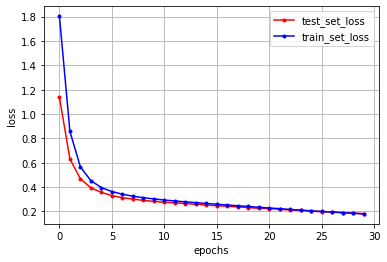

In [11]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='test_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()
plt.show()